In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#!/usr/bin/env python
# coding: utf-8


In [23]:
#For data processing
import pandas as pd
import numpy as np
import datetime as dt

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For models
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 


In [24]:

# # fix_yahoo_finance is used to fetch data 
# import yfinance as yf
# yf.pdr_override()


# # input
# symbol = 'RELIANCE.NS'
# start = '2017-01-01'
# end = '2018-01-01'


# # dataframe
# dataset = yf.download(symbol,start,end)



# # View the last 5 rows
# print('Last 5 Rows')
# print(df.tail())

#Read input file
df = pd.read_csv("C:\\Users\\tcgra\\Documents\\LJMU_Code\Datasets\\infosys_stock.csv")
df.head(5)



,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,87.468803,88.356201,87.234398,88.068001,13.421628,11811200
1,2004-01-02,88.281197,89.218803,87.750000,88.543701,13.494125,17143168
2,2004-01-05,89.843803,92.890602,88.750000,91.979698,14.017772,24806720
3,2004-01-06,92.968803,93.906197,88.005501,88.828102,13.537469,24549504
4,2004-01-07,89.812500,90.578102,87.394501,88.956299,13.557004,38803008


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697 entries, 0 to 3696
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3697 non-null   object 
 1   Open       3697 non-null   float64
 2   High       3697 non-null   float64
 3   Low        3697 non-null   float64
 4   Close      3697 non-null   float64
 5   Adj Close  3697 non-null   float64
 6   Volume     3697 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 202.3+ KB


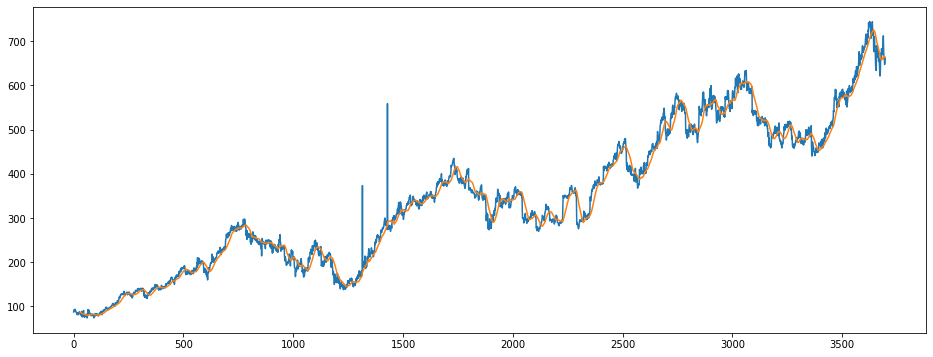

In [26]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Open'].plot()


FEATURE GENERATION

In [39]:
def get_technical_indicators(data): #function to generate feature technical indicators
    import talib as ta
    #Simple Moving Average
    data['SMA'] = ta.SMA(data['Adj Close'], timeperiod = 20)

    # Exponential Moving Average
    data['EMA'] = ta.EMA(data['Adj Close'], timeperiod = 20)
    # Plot
    data[['Adj Close','SMA','EMA']].plot(figsize=(10,5))
    plt.title('Adj Close, SMA & EMA)')
    plt.show()
    
    # Bollinger Bands
    data['upper_band'], data['middle_band'], data['lower_band'] = ta.BBANDS(data['Adj Close'], timeperiod =20)
    # Plot
    data[['Adj Close','upper_band','middle_band','lower_band']].plot(figsize=(10,5))
    plt.show()
    
    # Moving Average Convergence Divergence (MACD)
    data['macd'], data['macdsignal'], data['macdhist'] = ta.MACD(data['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    data[['macd','macdsignal']].plot(figsize=(10,5))
    plt.title('On Balance Volume (in millions)')
    plt.show() 
        
        
    # Relative Strength Index (RSI)
    data['RSI'] = ta.RSI(data['Adj Close'], timeperiod=14)
    # Plotting RSI
    fig,ax = plt.subplots(figsize=(10,5))
    ax.plot(data.index, data.RSI, label='RSI')
    ax.fill_between(data.index, y1=30, y2=70, color = 'lightcoral', alpha='0.3')
    ax.set_xlabel('Date')
    ax.set_ylabel('RSI')
    plt.show()
    
    # On Balanace Vol (OBV)
    data['OBV'] = ta.OBV(data['Adj Close'], data['Volume'])/10**6
    data.OBV.plot()
    plt.ylabel('On Balance Volume (in millions)')
    plt.show()
    
    #Average Directional Index (ADX)
    data.fillna(0, inplace=True)
#     return dataset
    return data

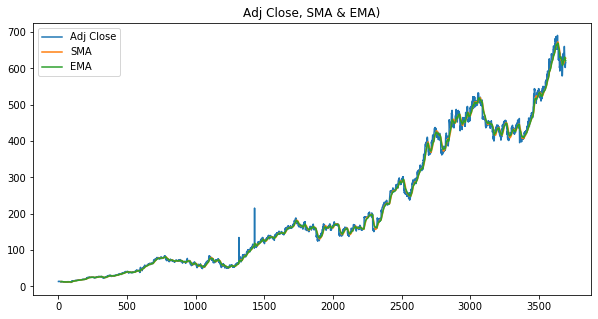

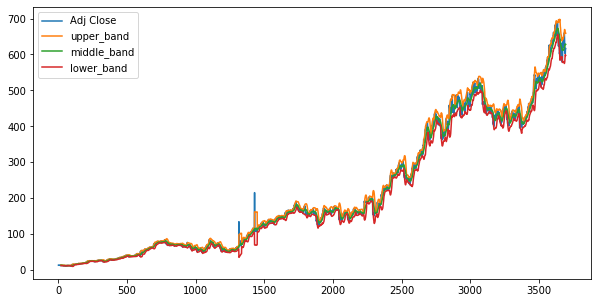

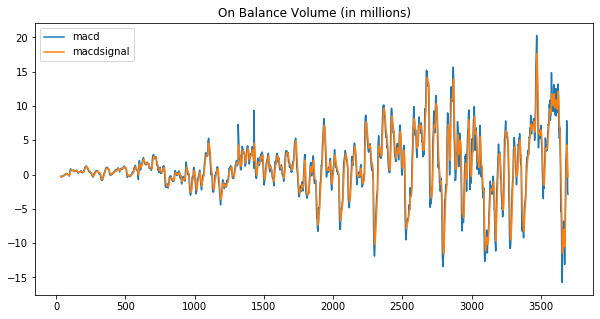

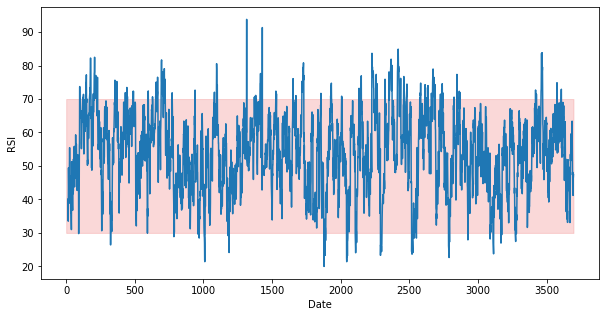

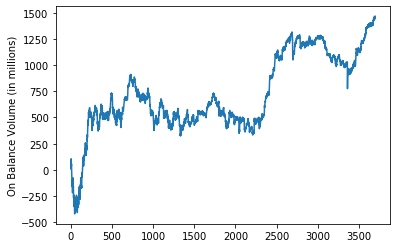

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,upper_band,middle_band,lower_band,macd,macdsignal,macdhist,RSI,OBV
0,2004-01-01,87.468803,88.356201,87.234398,88.068001,13.421628,11811200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.811200
1,2004-01-02,88.281197,89.218803,87.750000,88.543701,13.494125,17143168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.954368
2,2004-01-05,89.843803,92.890602,88.750000,91.979698,14.017772,24806720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.761088
3,2004-01-06,92.968803,93.906197,88.005501,88.828102,13.537469,24549504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.211584
4,2004-01-07,89.812500,90.578102,87.394501,88.956299,13.557004,38803008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.014592
5,2004-01-08,89.394501,92.096901,89.394501,91.376602,13.925856,37550336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.564928
6,2004-01-09,93.750000,95.312500,90.171898,90.946899,13.860373,48744256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.820672
7,2004-01-12,92.171898,92.171898,88.781197,89.377296,13.621163,22238464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.582208
8,2004-01-13,90.156197,90.765602,88.829697,90.525002,13.796080,22870912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.453120
9,2004-01-14,90.531197,90.714798,88.750000,89.148399,13.586282,22004800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.448320


In [40]:

df_TI = get_technical_indicators(df)
df_TI.head(10)

In [42]:
print('Total dataset has {} samples, and {} features.'.format(df_TI.shape[0], \
                                                              df_TI.shape[1]))

Total dataset has 3697 samples, and 17 features.


FINDING IMPORTANT FEATURES USING XGBOOST

In [43]:
def get_feature_importance_data(dataset):
    data = dataset.copy()
    y = data['Close']
    X = data.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

In [44]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(df_TI)

In [45]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

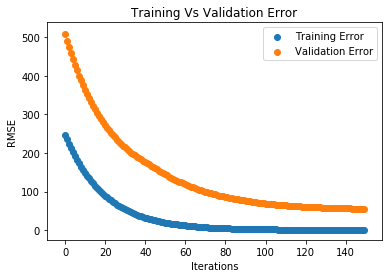

In [46]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

THE DIFFERENCE BETWEEN VALIDATION AND TRAINING ERROR SHOWS A UNDERFIT MODEL. EXPECTED BECAUSE OF THE WAY TRAINING AND TESTING DATA IS SPLIT JUST WHEN STOCK BOOMS

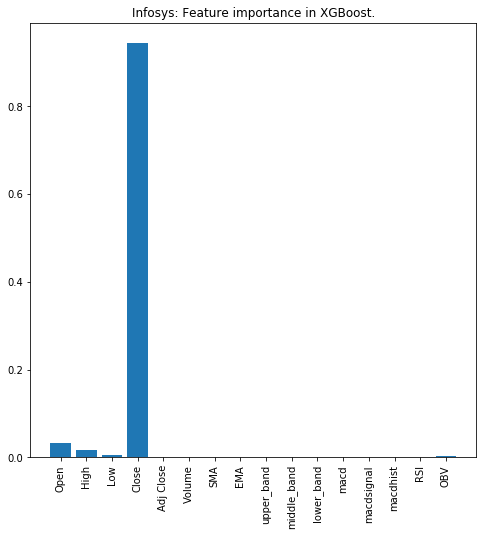

In [47]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Infosys: Feature importance in XGBoost.')
plt.show()

We could say that features OHLC and EMA are imp features

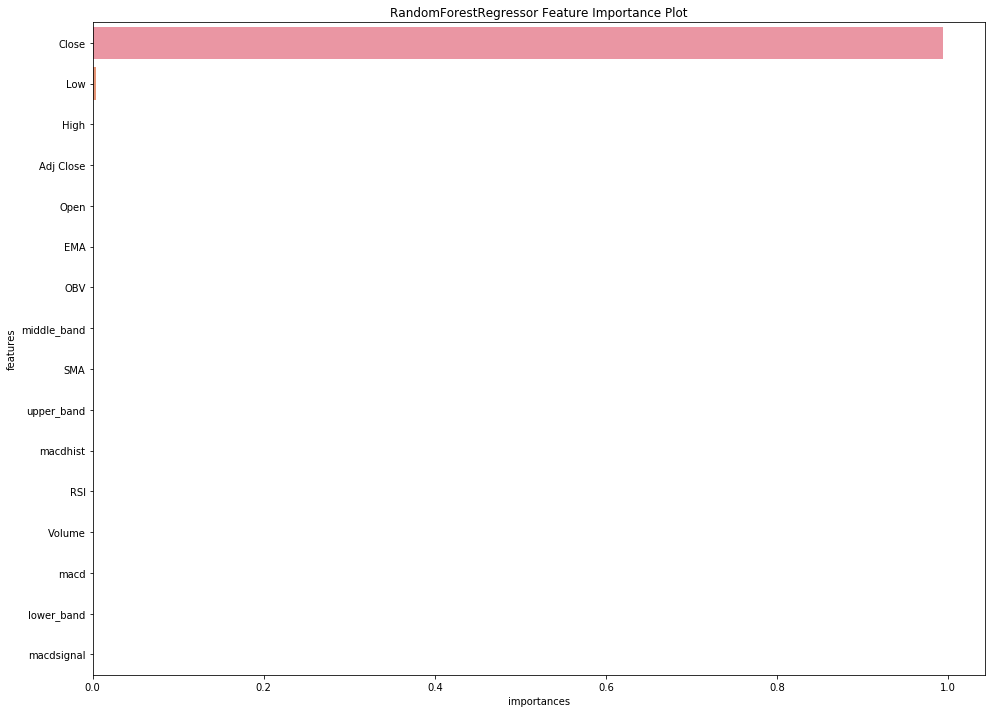

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=250, max_depth=25)
y = df_TI['Close']
X = df_TI.iloc[:,1:19]
model.fit(X,y)
importance = pd.DataFrame({'features': X.columns,'importances': model.feature_importances_})
importance = importance.sort_values('importances', ascending=False)
plt.figure(figsize = (16,12))
sns.barplot(importance.importances, importance.features)
plt.title('RandomForestRegressor Feature Importance Plot')
plt.show()

In [54]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_FI)

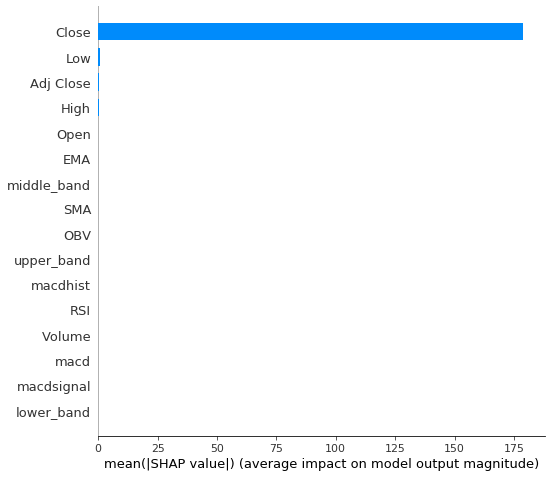

In [55]:
shap.summary_plot(shap_values, X_test_FI, plot_type="bar")

In [51]:
from sklearn.inspection import permutation_importance

In [56]:
perm_importance = permutation_importance(model, X_test_FI, y_test_FI)

Text(0.5, 0, 'Permutation Importance')

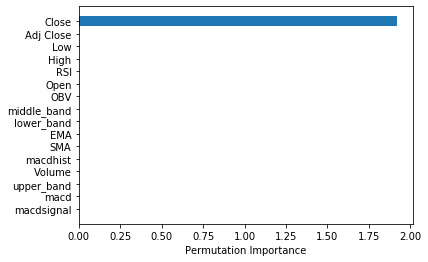

In [57]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")